**CODSOFT INTERNSHIP**

**TASK 3 : CREDIT CARD FRAUD DETECTION**

---

**TASK DESCRIPTION:**


*   Build a machine learning model to identify fraudulent credit card
transactions.
* Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
* Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.


---



Importing Required Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Loading the Credit Card Dataset :

In [ ]:
credit_card = pd.read_csv("creditcard.csv")

Checking the Start of the Dataset :

In [ ]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Checking the End of the Dataset :

In [ ]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138718,82808,-0.479350,0.291742,1.176496,-2.387149,0.225763,-0.140455,0.213530,0.038732,1.374953,...,0.065243,0.643628,-0.471645,-0.887663,0.300513,0.130897,0.391198,0.181765,1.00,0.0
138719,82808,-8.136440,-11.620969,2.567281,3.847285,8.302748,-6.405774,-6.552874,0.728037,-0.355693,...,0.803246,-0.551467,2.380975,0.282518,0.757671,0.031566,-0.484876,0.107559,283.50,0.0
138720,82809,-0.643764,0.426174,2.199543,0.079840,-0.034291,0.720443,-0.053732,0.530447,0.299450,...,0.101108,0.364598,-0.115569,-0.340284,-0.359793,-0.570781,0.183763,0.140580,9.99,0.0
138721,82809,1.103198,-0.516509,1.043418,0.702689,-1.292794,-0.381240,-0.631045,-0.004531,-0.856200,...,-0.140908,0.002740,0.050943,0.570334,0.227712,-0.309811,0.076024,0.051107,72.00,0.0
138722,82811,-1.301314,1.216130,1.029738,1.292400,-0.062383,0.015550,0.404308,0.180961,0.073446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Information :

In [ ]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138723 entries, 0 to 138722
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    138723 non-null  int64  
 1   V1      138723 non-null  float64
 2   V2      138723 non-null  float64
 3   V3      138723 non-null  float64
 4   V4      138723 non-null  float64
 5   V5      138723 non-null  float64
 6   V6      138723 non-null  float64
 7   V7      138723 non-null  float64
 8   V8      138723 non-null  float64
 9   V9      138723 non-null  float64
 10  V10     138723 non-null  float64
 11  V11     138723 non-null  float64
 12  V12     138723 non-null  float64
 13  V13     138723 non-null  float64
 14  V14     138722 non-null  float64
 15  V15     138722 non-null  float64
 16  V16     138722 non-null  float64
 17  V17     138722 non-null  float64
 18  V18     138722 non-null  float64
 19  V19     138722 non-null  float64
 20  V20     138722 non-null  float64
 21  V21     13

Checking for Missing Values :

In [ ]:
credit_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Class Distribution (Fraud vs Legit) :

In [ ]:
credit_card["Class"].value_counts()

,count
Class,
0.0,138458
1.0,264


Separating Legit and Fraud Transactions :

In [ ]:
legit = credit_card[credit_card.Class == 0]
fraud = credit_card[credit_card.Class == 1]

print(legit.shape)
print(fraud.shape)

(138458, 31)
(264, 31)


Statistical Summary of Legit Transactions :

In [ ]:
legit.Amount.describe()

,Amount
count,138458.000000
mean,91.326355
std,247.818289
min,0.000000
25%,6.040000
50%,23.990000
75%,81.000000
max,19656.530000


Statistical Summary of Fraud Transactions :

In [ ]:
fraud.Amount.describe()

,Amount
count,264.000000
mean,115.387008
std,245.189867
min,0.000000
25%,1.000000
50%,9.560000
75%,99.990000
max,1809.680000


Mean Comparison by Class :

In [ ]:
credit_card.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,51587.410854,-0.237937,0.007939,0.687613,0.131863,-0.276876,0.080863,-0.106094,0.061851,-0.086793,...,0.041947,-0.041688,-0.117943,-0.033357,0.011940,0.130242,0.023468,-0.000135,0.002096,91.326355
1.0,42420.212121,-5.610819,3.946507,-7.143814,4.512206,-3.977333,-1.480669,-5.936405,1.508791,-2.604923,...,0.239899,1.256981,-0.311690,-0.116543,-0.107463,0.197988,0.056528,0.489643,0.081783,115.387008


Under-Sampling Legit Transactions :

In [ ]:
legit_sample = legit.sample(n=492)

Creating Balanced Dataset :

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

Preview of New Dataset :

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13840,24558,-0.240269,1.394801,0.155252,0.898292,0.594799,-0.576239,0.820424,-0.255171,0.813062,...,-0.016800,0.501478,-0.025425,-0.048443,-0.776736,-0.530149,-0.312126,-0.306708,3.84,0.0
33335,37193,-1.322646,-0.965441,2.678328,-1.404713,0.197717,-0.907936,-0.221553,-0.341730,1.168480,...,0.148731,0.955482,-0.437202,0.661818,0.237473,0.151661,-0.301947,-0.314064,49.00,0.0
10392,16746,-1.002271,1.054318,1.242808,-1.133862,0.217296,0.039538,-0.049689,0.539888,0.770724,...,-0.270312,-0.666776,-0.133279,-0.850825,-0.211220,0.669237,0.105476,0.062489,6.04,0.0
6807,8583,-0.976429,1.561055,1.756081,2.649626,0.475624,1.412976,-0.248854,0.677233,-0.235345,...,-0.193977,-0.344758,-0.197761,-1.369032,0.127135,0.228436,0.215330,0.054762,26.97,0.0
9102,12807,-0.646424,0.617808,1.348266,-1.510966,-0.926790,0.452395,-1.605291,-3.124127,0.250583,...,3.337739,-0.071343,0.022288,0.168707,1.108434,-0.091833,0.220143,0.187315,15.00,0.0


Checking Class Balance in New Dataset :

In [ ]:
new_dataset["Class"].value_counts()

,count
Class,
0.0,492
1.0,264


Mean Comparison After Balancing :

In [ ]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,49909.843496,-0.286065,0.049717,0.787557,0.223876,-0.292252,0.062705,-0.103971,0.100984,-0.077389,...,0.079989,-0.001149,-0.105994,-0.047734,0.028534,0.106236,0.015253,-0.011364,0.016763,89.645285
1.0,42420.212121,-5.610819,3.946507,-7.143814,4.512206,-3.977333,-1.480669,-5.936405,1.508791,-2.604923,...,0.239899,1.256981,-0.311690,-0.116543,-0.107463,0.197988,0.056528,0.489643,0.081783,115.387008


Separating Features and Target Variable :

In [ ]:
X = new_dataset.drop(columns="Class", axis=1)
Y = new_dataset["Class"]

Spliting Data into Train and Test Sets :

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

Checking Data Shapes :

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(756, 30) (604, 30) (152, 30)


Initializing Logistic Regression Model :

In [ ]:
model = LogisticRegression()

Training the Model :

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Accuracy Evaluation :

In [ ]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)

X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.956953642384106
Testing Accuracy: 0.9407894736842105


Feature Correlation Heatmap :

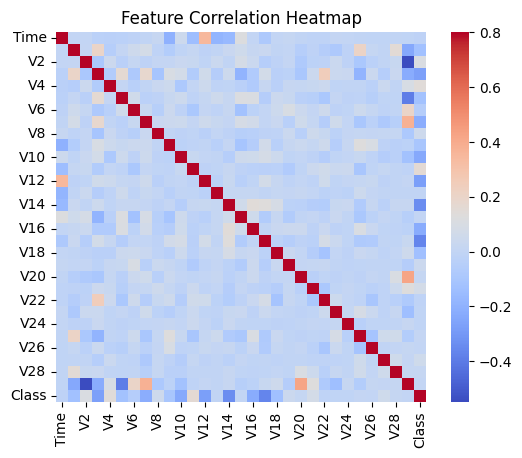

In [ ]:
import seaborn as sns
corr = credit_card.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
Y_test

,Class
66403,0.0
24996,0.0
103421,0.0
27749,1.0
42473,1.0
...,...
14566,0.0
57470,1.0
35106,0.0
125215,0.0


In [ ]:
Y_train.isnull().sum()

np.int64(0)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Creation of Confusion Matrix :

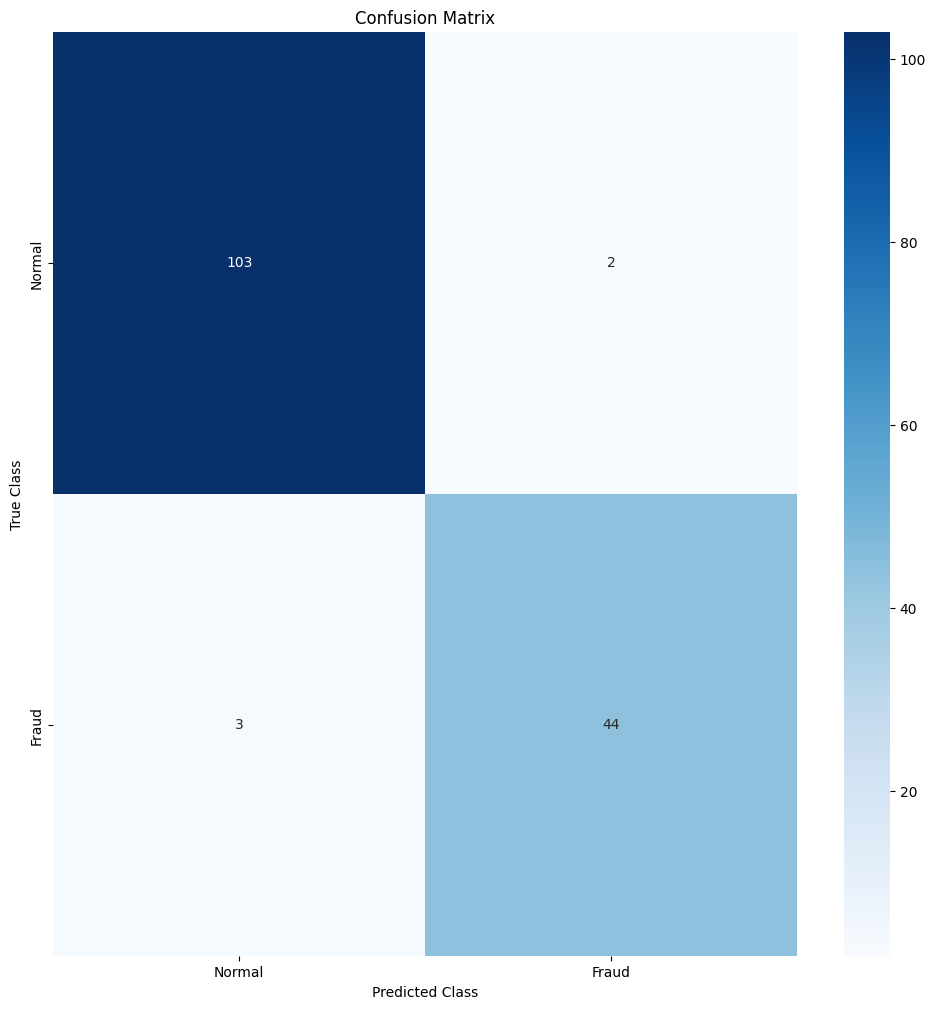

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()